<a href="https://colab.research.google.com/github/cristiandarioortegayubro/BDS/blob/main/modulo.08/Credit_Card_Fraud_%26_Anomaly_Detection_(DecisionTrees%2C_CNNs%2C_and_ANNs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/Logo%20BDS%20Horizontal%208.png?raw=true">
</p>

### Ejemplo extraído de https://github.com/alkhalifas/credit-card-fraud-anomaly-detection-machine-learning

## Credit Card Fraud/Anomaly Detection (DecisionTrees, XGBoost, CNNs, and ANNs)

##### About the Data:

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

##### Objective:

To develop a classification model that can identify, with high certainty, whether a transaction is fradulent or not given the current dataset.

### 1. Import Libraries:

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")


### 2. Import Data:

In [ ]:
df = pd.read_csv("C:\\Curso Pronóstico\\Business DS\\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### 3. Exploratory Data Analysis:

In [ ]:
df.shape

(284807, 31)

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.Class.value_counts()
# 0 = Valid
# 1 = Fraud

Class
0    284315
1       492
Name: count, dtype: int64

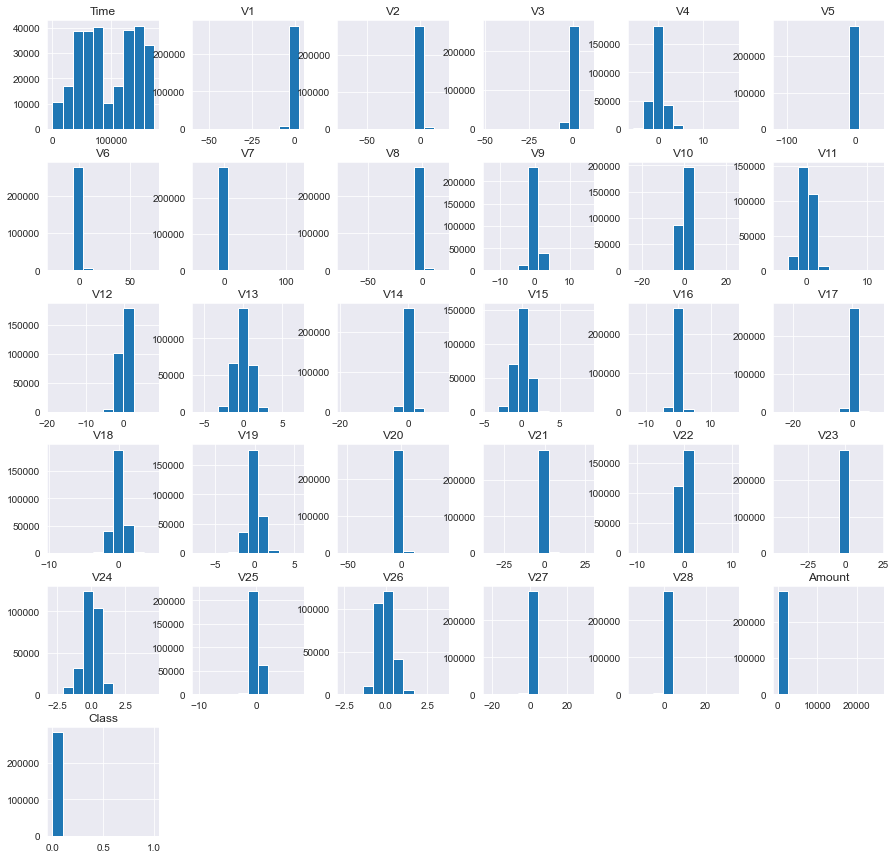

In [ ]:
df.hist(figsize=(15,15));

C:\Users\kapla\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


<Figure size 1440x720 with 0 Axes>

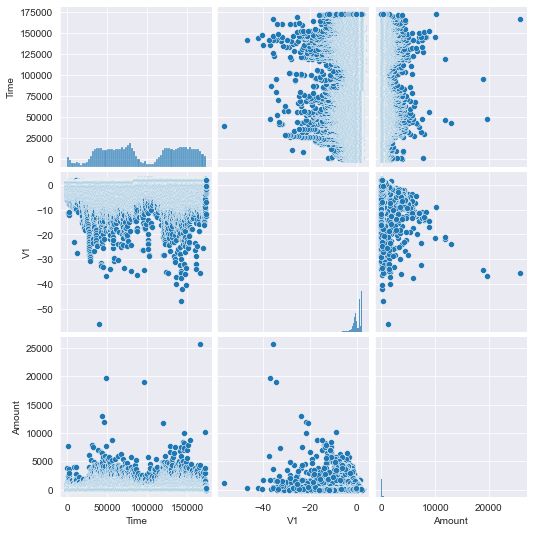

In [ ]:
plt.figure(figsize=(20,10))
sns.pairplot(df[["Time","V1", "Amount"]])

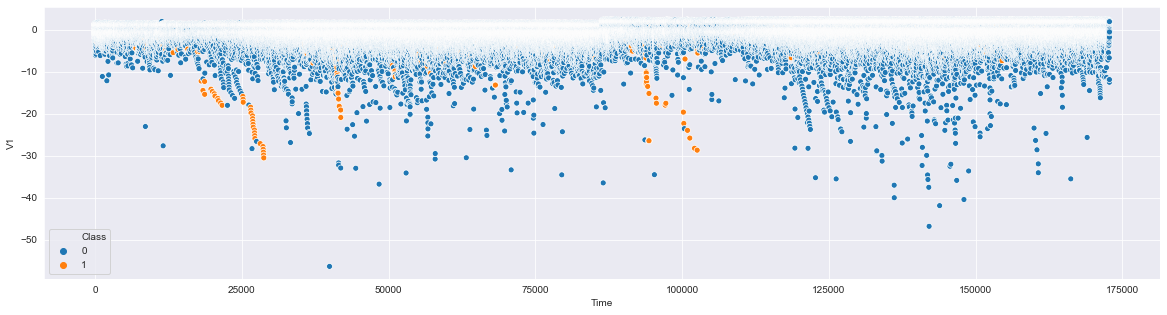

In [ ]:
plt.figure(figsize=(20,5))
sns.scatterplot(df["Time"], df["V1"], hue=df["Class"])

C:\Users\kapla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='V1', ylabel='V2'>

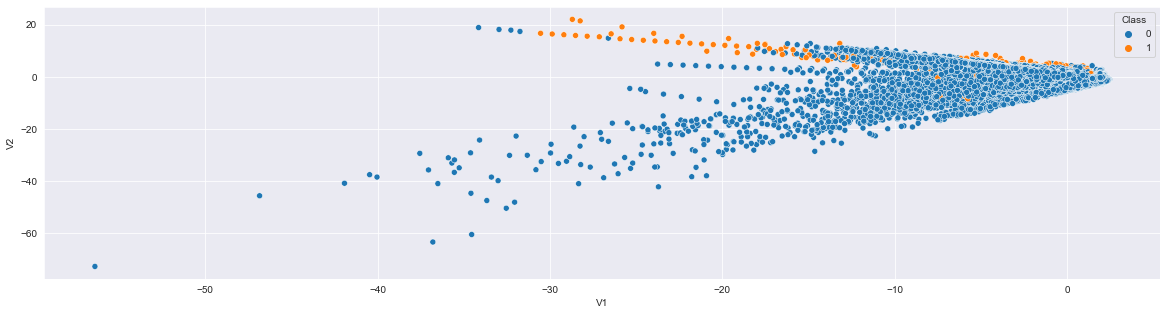

In [ ]:
plt.figure(figsize=(20,5))
sns.scatterplot(df["V1"], df["V2"], hue=df["Class"])

### 4. Preprocessing:

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = df.iloc[:, :-1]
y = df.Class.values.ravel()

X_scaled = scaler.fit_transform(X)

###  5. Split Training and Testing Data:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(213605, 30)
(71202, 30)
(213605,)
(71202,)


### 6. Model Development

#### Random Forests Classification:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.93      0.81      0.86       113

    accuracy                           1.00     71202
   macro avg       0.96      0.90      0.93     71202
weighted avg       1.00      1.00      1.00     71202



#### XGBoost Classification:

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.95      0.78      0.85       113

    accuracy                           1.00     71202
   macro avg       0.97      0.89      0.93     71202
weighted avg       1.00      1.00      1.00     71202



#### Artificial Neural Network using Keras:

In [ ]:
from tensorflow import keras
#print(keras.__version__)

In [ ]:
model = keras.Sequential(
    [
        keras.layers.Dense(32, activation="relu", input_shape=(X_train.shape[-1],)),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                992       
                                                                 
 dense_1 (Dense)             (None, 128)               4224      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 38497 (150.38 KB)
Trainable params: 38497 

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(1e-2),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
history = model.fit(
                    X_train,
                    y_train,
                    batch_size=2048,
                    epochs=30,
                    verbose=2,
                    validation_split = 0.2)

Epoch 1/30
84/84 - 2s - loss: 53.1013 - accuracy: 0.9903 - val_loss: 0.0350 - val_accuracy: 0.9982 - 2s/epoch - 21ms/step
Epoch 2/30
84/84 - 1s - loss: 0.1596 - accuracy: 0.9980 - val_loss: 0.0342 - val_accuracy: 0.9982 - 672ms/epoch - 8ms/step
Epoch 3/30
84/84 - 1s - loss: 0.0709 - accuracy: 0.9981 - val_loss: 0.0271 - val_accuracy: 0.9982 - 642ms/epoch - 8ms/step
Epoch 4/30
84/84 - 1s - loss: 0.0531 - accuracy: 0.9981 - val_loss: 0.0317 - val_accuracy: 0.9982 - 675ms/epoch - 8ms/step
Epoch 5/30
84/84 - 1s - loss: 0.0458 - accuracy: 0.9980 - val_loss: 0.0247 - val_accuracy: 0.9982 - 667ms/epoch - 8ms/step
Epoch 6/30
84/84 - 1s - loss: 0.0363 - accuracy: 0.9981 - val_loss: 0.0208 - val_accuracy: 0.9982 - 693ms/epoch - 8ms/step
Epoch 7/30
84/84 - 1s - loss: 0.0334 - accuracy: 0.9982 - val_loss: 0.0193 - val_accuracy: 0.9982 - 741ms/epoch - 9ms/step
Epoch 8/30
84/84 - 1s - loss: 0.0250 - accuracy: 0.9981 - val_loss: 0.0183 - val_accuracy: 0.9982 - 679ms/epoch - 8ms/step
Epoch 9/30
84/84 

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
results = pd.DataFrame(history.history)
results.head(5)

,loss,accuracy,val_loss,val_accuracy
0,53.101257,0.990309,0.035037,0.998151
1,0.159551,0.998016,0.034177,0.998151
2,0.070865,0.998081,0.027053,0.998151
3,0.053089,0.998110,0.031676,0.998151
4,0.045842,0.998010,0.024683,0.998151


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 [Text(0, -10.0, '−10'),
  Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60')])

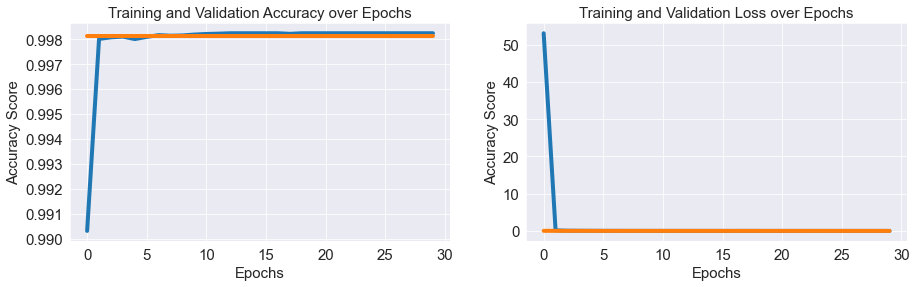

In [ ]:
plt.figure(figsize = (15,4))

plt.subplot(121)
plt.plot(results.index, results.accuracy, label="Training Accuracy", linewidth=4)
plt.plot(results.index, results.val_accuracy, label="Validation Accuracy", linewidth=4)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Accuracy Score", fontsize=15)
plt.title("Training and Validation Accuracy over Epochs" , fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(122)
plt.plot(results.index, results.loss, label="Training Loss", linewidth=4)
plt.plot(results.index, results.val_loss, label="Validation Loss", linewidth=4)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Accuracy Score", fontsize=15)
plt.title("Training and Validation Loss over Epochs", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#### Artificial Neural Network using Keras with Metrics & Weights:

In [ ]:
counts = np.bincount(y_train)
wt_0 = 1.0 / counts[0]
wt_1 = 1.0 / counts[1]

print(wt_0)
print(wt_1)

4.689859585604007e-06
0.002638522427440633


In [ ]:
model_2 = keras.Sequential(
    [
        keras.layers.Dense(
            256, activation="relu", input_shape=(X_train.shape[-1],)
        ),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               7936      
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 139,777
Trainable params: 139,777
Non-trainable params: 0
________________________________________________

In [ ]:
metrics = [
    keras.metrics.Precision(name="precision"),
#     keras.metrics.Recall(name="recall"),
#     keras.metrics.Accuracy(name="accuracy")
]

model_2.compile(
    optimizer=keras.optimizers.Adam(1e-2), loss="binary_crossentropy", metrics=metrics
)



history = model_2.fit(
                    X_train,
                    y_train,
                    batch_size=2048,
                    epochs=30,
                    verbose=2,
                    validation_split = 0.2,
                    class_weight = {0: wt_0, 1: wt_1}
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 170884 samples, validate on 42721 samples
Epoch 1/30
170884/170884 - 4s - loss: 0.0069 - precision: 0.0018 - val_loss: 6.6377e-06 - val_precision: 0.0018
Epoch 2/30
170884/170884 - 3s - loss: 1.0573e-05 - precision: 0.0018 - val_loss: 6.6373e-06 - val_precision: 0.0019
Epoch 3/30
170884/170884 - 3s - loss: 6.8856e-06 - precision: 0.0016 - val_loss: 6.6349e-06 - val_precision: 0.0000e+00
Epoch 4/30
170884/170884 - 3s - loss: 6.7456e-06 - precision: 0.0017 - val_loss: 6.6229e-06 - val_precision: 0.0019
Epoch 5/30
170884/170884 - 3s - loss: 6.5976e-06 - precision: 0.0018 - val_loss: 6.6293e-06 - val_precision: 0.0000e+00
Epoch 6/30
170884/170884 - 3s - loss: 6.4828e-06 - precision: 0.0016 - val_loss: 6.6907e-06 - val_precision: 0.0018
Epoch 7/30
170884/170884 - 3s - loss: 6.5359e-06 - precision: 0.0022 - val_loss: 6.6305e-06 - val_precision: 0.0000e+00
Epoch 8/30
170884/170884 - 3s - loss: 6.6244e-06 - precision: 0.0017 - val_loss

In [ ]:
score = model_2.evaluate(X_test, y_test)


71202/71202 [==============================] - 3s 46us/sample - loss: 0.6660 - precision: 0.0000e+00


#### Convolutional Neural Network using Keras with Metrics & Weights:

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [ ]:
X_train.shape[-1]

30

In [ ]:
X_test_d = np.expand_dims(X_test, -1)
X_train_d  = np.expand_dims(X_train, -1)

In [ ]:
X_test_d

array([[[ 4.15050000e+04],
        [-1.65265066e+01],
        [ 8.58497180e+00],
        ...,
        [-2.01857525e+00],
        [-1.04280417e+00],
        [ 3.64190000e+02]],

       [[ 4.42610000e+04],
        [ 3.39812064e-01],
        [-2.74374524e+00],
        ...,
        [ 4.09958027e-02],
        [ 1.02037825e-01],
        [ 5.20120000e+02]],

       [[ 3.54840000e+04],
        [ 1.39959027e+00],
        [-5.90701288e-01],
        ...,
        [ 1.14086454e-02],
        [ 4.63414166e-03],
        [ 3.10000000e+01]],

       ...,

       [[ 1.32978000e+05],
        [ 1.87246271e+00],
        [-6.32347628e-01],
        ...,
        [-9.58516121e-02],
        [-4.56849823e-02],
        [ 8.98000000e+01]],

       [[ 1.21067000e+05],
        [-1.33832678e+00],
        [ 1.08222763e+00],
        ...,
        [-3.04586624e-01],
        [-2.13661132e-01],
        [ 2.00000000e+01]],

       [[ 7.19500000e+04],
        [ 1.47242234e+00],
        [-1.11637013e+00],
        ...,
        

In [ ]:
model_3 = Sequential()
model_3.add(Conv1D(32, 2, activation='relu', input_shape=X_test_d[0].shape))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.1))

model_3.add(Conv1D(64, 2, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.2))

model_3.add(Conv1D(128, 2, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.3))

model_3.add(Flatten())
model_3.add(Dropout(0.4))
model_3.add(Dense(512, activation='relu'))
model_3.add(Dropout(0.5))

model_3.add(Dense(1, activation='sigmoid'))

In [ ]:
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_1 (Batch (None, 29, 32)            128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 29, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 27, 128)          

In [ ]:
METRICS = [
    'accuracy',
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]

model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=METRICS)
history = model_3.fit(X_train_d, y_train,
              validation_split=0.2,
              batch_size=16,
              epochs=20,
             )

Train on 170884 samples, validate on 42721 samples
Epoch 1/20
170884/170884 [==============================] - 347s 2ms/step - loss: 0.0213 - accuracy: 0.9986 - precision: 0.5986 - recall: 0.5867 - val_loss: 0.0150 - val_accuracy: 0.9992 - val_precision: 0.7875 - val_recall: 0.7975
Epoch 2/20
170884/170884 [==============================] - 360s 2ms/step - loss: 0.0143 - accuracy: 0.9988 - precision: 0.6962 - recall: 0.6033 - val_loss: 0.0098 - val_accuracy: 0.9994 - val_precision: 0.8421 - val_recall: 0.8101
Epoch 3/20
170884/170884 [==============================] - 358s 2ms/step - loss: 0.0122 - accuracy: 0.9989 - precision: 0.7362 - recall: 0.6233 - val_loss: 0.0083 - val_accuracy: 0.9990 - val_precision: 0.8958 - val_recall: 0.5443
Epoch 4/20
170884/170884 [==============================] - 353s 2ms/step - loss: 0.0093 - accuracy: 0.9990 - precision: 0.7669 - recall: 0.6033 - val_loss: 0.0091 - val_accuracy: 0.9994 - val_precision: 0.8462 - val_recall: 0.8354
Epoch 5/20
170884/170

In [ ]:
score = model.evaluate(X_test, y_test)
score

71202/71202 [==============================] - 2s 25us/sample - loss: 0.0120 - accuracy: 0.9984


[0.011998185088613621, 0.99841297]

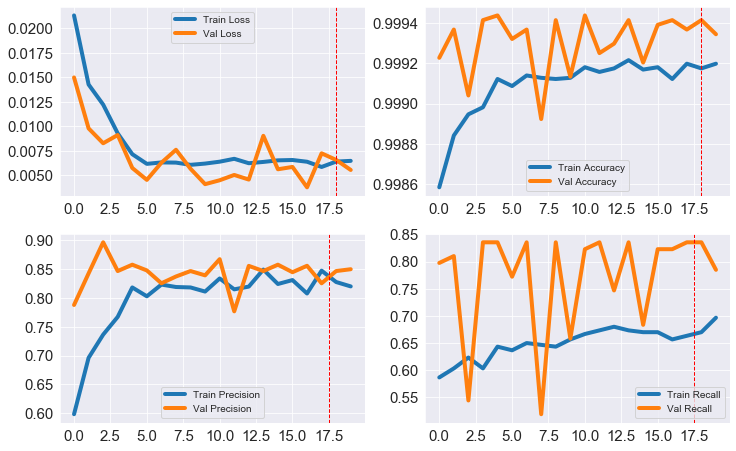

In [ ]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', linewidth=4)
plt.plot(history.history['val_loss'], label='Val Loss', linewidth=4)
plt.legend()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axvline(x=18, color="red",linestyle='dashed', linewidth=1)


plt.subplot(4, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy', linewidth=4)
plt.plot(history.history['val_accuracy'], label='Val Accuracy', linewidth=4)
plt.legend()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axvline(x=18, color="red",linestyle='dashed', linewidth=1)


plt.subplot(4, 2, 3)
plt.plot(history.history['precision'], label='Train Precision', linewidth=4)
plt.plot(history.history['val_precision'], label='Val Precision', linewidth=4)
plt.legend()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axvline(x=17.5, color="red",linestyle='dashed', linewidth=1)

plt.subplot(4, 2, 4)
plt.plot(history.history['recall'], label='Train Recall', linewidth=4)
plt.plot(history.history['val_recall'], label='Val Recall', linewidth=4)
plt.legend()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axvline(x=17.5, color="red",linestyle='dashed', linewidth=1)


<br>
<br>
<p align="center"><b>
💗
<font color="DeepPink">
Hemos llegado al final de nuestro colab...
</font>
</p>
<br>
<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/Logo%20BDS%20Horizontal%208.png?raw=true">
</p>

---